In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from keras.datasets import cifar10, cifar100
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, MaxPooling2D, Flatten

In [0]:
#loading and dividing dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [105]:
#Shape of the dataset
print('Shape of x_train :',x_train.shape)
print('Shape of x_test :',x_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of x_train : (50000, 32, 32, 3)
Shape of x_test : (10000, 32, 32, 3)
Shape of y_train : (50000, 1)
Shape of y_test : (10000, 1)


In [106]:
classes = np.unique(y_train)
n_classes = len(classes)

print('Total unique classes :', classes)
print('Total number of unique classes :',n_classes)

Total unique classes : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Total number of unique classes : 100


Text(0.5, 1.0, 'Given truth : [14]')

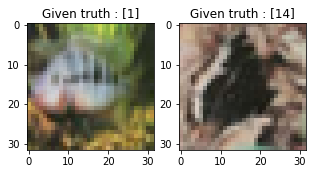

In [107]:
#plotting the first image in training data
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(x_train[4,:,:], cmap='gray')
plt.title('Given truth : {}'.format(y_train[4]))

#plotting the first image in testing data
plt.subplot(122)
plt.imshow(x_test[7,:,:])
plt.title('Given truth : {}'.format(y_test[7]))

pixel quality is so dangerous!

In [108]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print('Original label :',y_train[0])
print('After one hot encoding :',y_train_one_hot[0])

print('Shape of y_train_one_hot :', y_train_one_hot.shape)
print('Shape of y_test_one_hot :', y_test_one_hot.shape)

Original label : [19]
After one hot encoding : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Shape of y_train_one_hot : (50000, 100)
Shape of y_test_one_hot : (10000, 100)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))


In [110]:
#printing summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)      

In [0]:
#compiling the model
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

In [0]:
#for train data
train_datagen = ImageDataGenerator(rescale=1./255,  
                      shear_range=0.2, 
                      zoom_range=0.2,  
                      horizontal_flip=True,                
                      )

train_datagen.fit(x_train)

#for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen.fit(x_test)

In [117]:
#training the model
model_fit = model.fit_generator(train_datagen.flow(x_train, y_train_one_hot, batch_size=64), epochs=20, verbose=1)

Epoch 1/20
782/782 [==============================] - 20s 26ms/step - loss: 3.8854 - accuracy: 0.1206
Epoch 2/20
782/782 [==============================] - 20s 26ms/step - loss: 3.1509 - accuracy: 0.2437
Epoch 3/20
782/782 [==============================] - 20s 26ms/step - loss: 2.8982 - accuracy: 0.2936
Epoch 4/20
782/782 [==============================] - 20s 26ms/step - loss: 2.7604 - accuracy: 0.3203
Epoch 5/20
782/782 [==============================] - 20s 26ms/step - loss: 2.6740 - accuracy: 0.3351
Epoch 6/20
782/782 [==============================] - 21s 26ms/step - loss: 2.6185 - accuracy: 0.3481
Epoch 7/20
782/782 [==============================] - 21s 27ms/step - loss: 2.5590 - accuracy: 0.3586
Epoch 8/20
782/782 [==============================] - 21s 27ms/step - loss: 2.5278 - accuracy: 0.3689
Epoch 9/20
782/782 [==============================] - 21s 27ms/step - loss: 2.4928 - accuracy: 0.3759
Epoch 10/20
782/782 [==============================] - 21s 27ms/step - loss: 2.473

dagerous accuracy

In [121]:
#evaluating with test data
test_eval = model.evaluate(test_datagen.flow(x_test,y_test_one_hot))
print('Loss is :',test_eval[0])
print('Accuracy is :',test_eval[1])

313/313 [==============================] - 1s 3ms/step
Loss is : 2.303956985473633
Accuracy is : 0.4490000009536743


In [122]:
#this is float value of the class
predicted_classes = model.predict(x_test)

#converting float value to integer value
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
print(predicted_classes.shape)
print(y_test.shape)

(10000,)
(10000, 1)


## Classification Report

In [124]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       100
           1       0.50      0.01      0.02       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.21      0.36      0.27       100
           7       0.44      0.04      0.07       100
           8       1.00      0.09      0.17       100
           9       0.15      0.44      0.22       100
          10       0.00      0.00      0.00       100
          11       0.29      0.02      0.04       100
          12       0.00      0.00      0.00       100
          13       0.50      0.03      0.06       100
          14       0.22      0.11      0.15       100
          15       1.00      0.01      0.02       100
          16       0.50      0.06      0.11       100
          17       0.75    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(173.4, 0.5, 'predicted label')

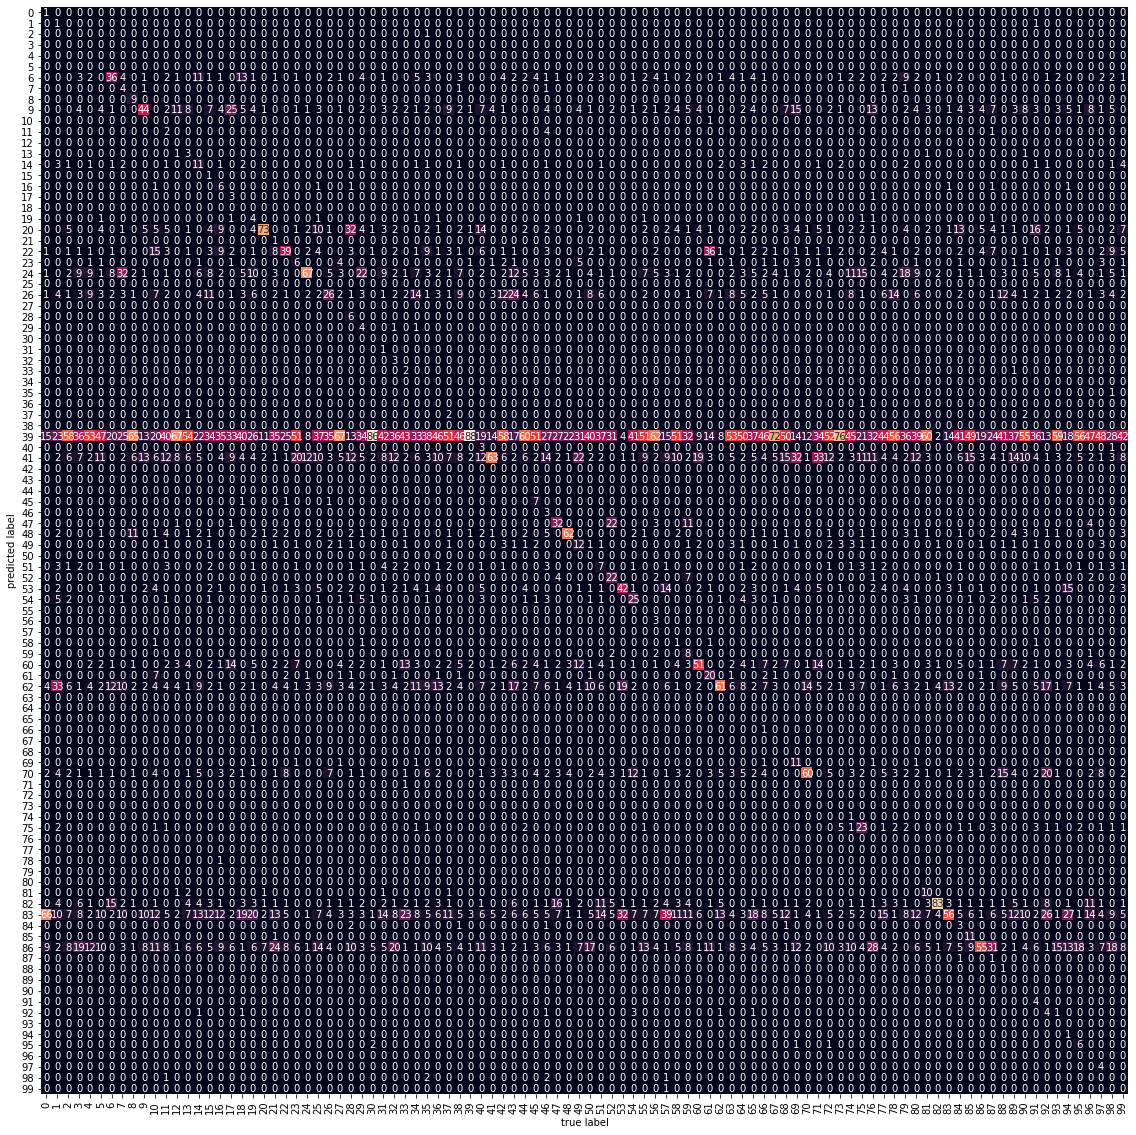

In [125]:
#printing confusion matrix
plt.figure(figsize=(20,20))
mat = confusion_matrix(y_test, predicted_classes)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')